In [20]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15
import warnings 
warnings.filterwarnings(action='ignore')
import pandas_profiling

In [21]:
import pandas_profiling
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [22]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [23]:
df = pd.read_csv('Seoul_Analysis_final.csv')
df.head(5)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,XYZ,Covid,지속소비등급,cluster,한번소비
0,201903,10,의류,1010,여성의류,여성,40,초중고자녀가구,서울특별시,구로구,궁동,782521,13,Y,b_cov,실버,4,60193.923077
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20,신혼영유아가구,서울특별시,구로구,궁동,963789,29,Z,b_cov,실버,4,33234.103448
2,201903,19,출산/육아,1913,육아용품서비스,여성,30,신혼영유아가구,서울특별시,구로구,궁동,924309,46,Y,b_cov,골드,2,20093.673913
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,Y,b_cov,골드,2,20173.333333
4,201903,17,생활,1710,생활용품,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,Y,b_cov,골드,2,28564.482759


In [24]:
df2 = pd.read_excel('금융데이터거래소_데이터경진대회_신한카드.xlsx')

In [25]:
cond =  df2['광역시도명'] == '서울'

df2 =  df2[cond]

In [26]:
print(df2.shape)
df2.head(5)

(1391, 12)


,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
3004,201903,서울,기타,자사가맹점,자사가맹점,0,0,72,51688004000,5423775,717888943,9530
3005,201903,서울,기타,해외사용,해외사용,0,0,10,34835382000,260409,3483538226,133772
3006,201903,서울,문화레져,동물,동물농장,0,0,7,16296000,603,2328014,27025
3007,201903,서울,문화레져,동물,애완동물/용품,48,29,1259,1863512000,52081,1480153,35781
3008,201903,서울,문화레져,동물병원,병원-동물병원,2,1,791,4774259000,57097,6035725,83617


# lightgbm

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [28]:
x_train= df[['기준년월', '품목대분류명', '품목중분류명', '한번소비']]
y_train = df['cluster'] 


x_test = df2[['기준년월', '업종대분류', '업종중분류', '건당매출금액']]

In [29]:
x_train['품목중분류명'] =  x_train['품목중분류명'].astype('category')
x_train['품목중분류명'] = x_train.품목중분류명.cat.codes

x_train['품목대분류명'] =  x_train['품목대분류명'].astype('category')
x_train['품목대분류명'] = x_train.품목대분류명.cat.codes


x_test['업종대분류'] =  x_test['업종대분류'].astype('category')
x_test['업종대분류'] = x_test.업종대분류.cat.codes


x_test['업종중분류'] =  x_test['업종중분류'].astype('category')
x_test['업종중분류'] = x_test.업종중분류.cat.codes


In [30]:
#Modeling

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

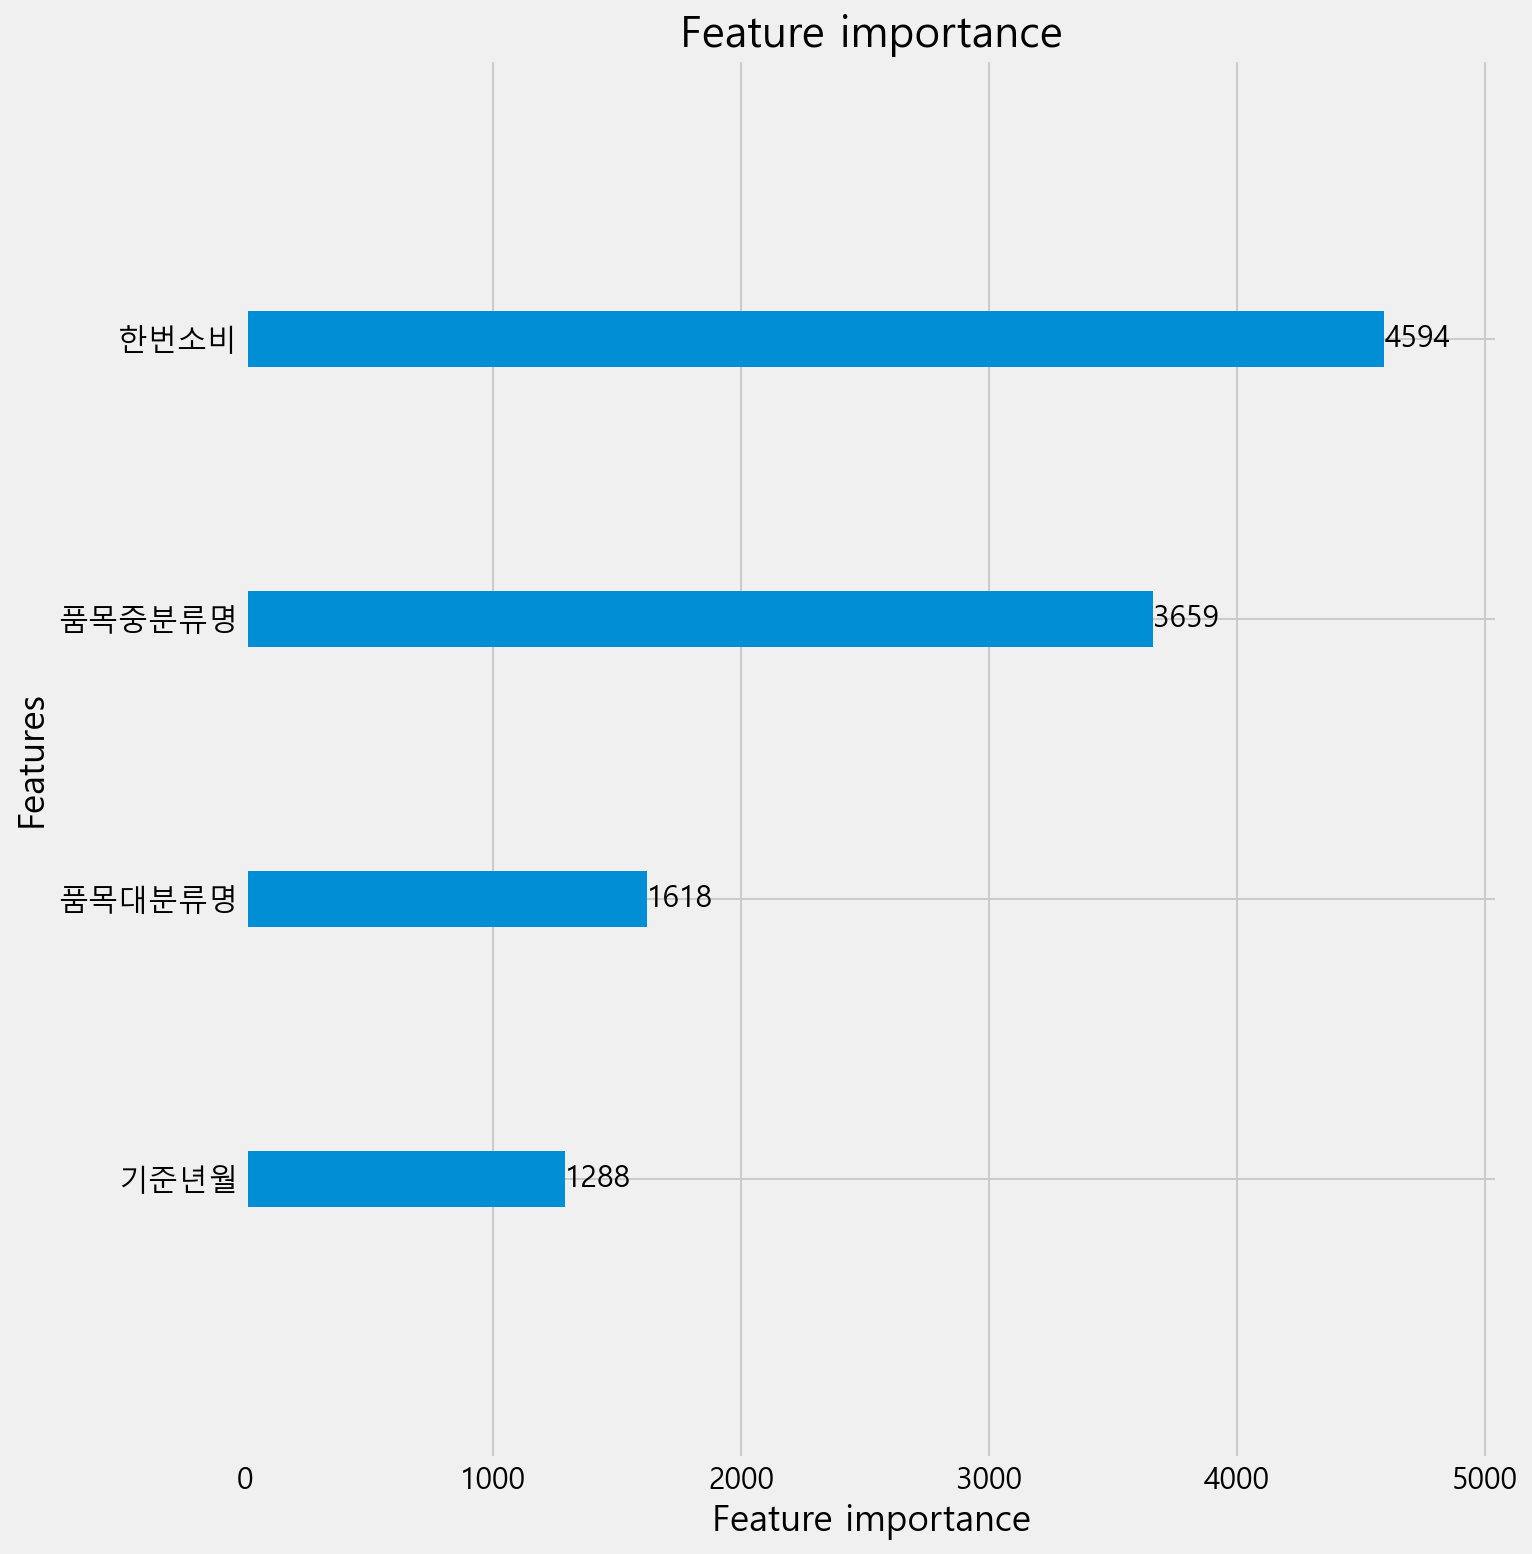

In [31]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import matplotlib.pyplot as plt

# train
lgbm = LGBMClassifier(n_estimators = 400, learning_rate = 0.3, max_depth = 3 , random_state=2021)
lgbm.fit(x_train, y_train)

# prediction
w_pred = lgbm.predict(x_test)
w_pred_proba = lgbm.predict_proba(x_test)[:,1]

# importance plot
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm, ax=ax)

In [32]:
x_test['cluster'] = w_pred

In [33]:
x_test['cluster'].value_counts()

4    831
1    319
3    216
2     25
Name: cluster, dtype: int64

In [34]:
# 서울 한정 


# 파생변수 설명 추가

# 유형 숫자 써주고  + 지형이나 좀도 구체적으로 써주기

# 유형별 결론및 견해 써주기 = > 결론 및 견해 추가

In [35]:
x_test

,기준년월,업종대분류,업종중분류,건당매출금액,cluster
3004,201903,0,72,9530,4
3005,201903,0,93,133772,4
3006,201903,1,18,27025,4
3007,201903,1,18,35781,4
3008,201903,1,19,83617,4
...,...,...,...,...,...
21287,202009,7,76,7819,3
21288,202009,7,76,10191,3
21289,202009,7,76,34714,3
21290,202009,7,87,6206,3


In [36]:
df2['cluster'] = w_pred

In [37]:
df2.head()

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,cluster
3004,201903,서울,기타,자사가맹점,자사가맹점,0,0,72,51688004000,5423775,717888943,9530,4
3005,201903,서울,기타,해외사용,해외사용,0,0,10,34835382000,260409,3483538226,133772,4
3006,201903,서울,문화레져,동물,동물농장,0,0,7,16296000,603,2328014,27025,4
3007,201903,서울,문화레져,동물,애완동물/용품,48,29,1259,1863512000,52081,1480153,35781,4
3008,201903,서울,문화레져,동물병원,병원-동물병원,2,1,791,4774259000,57097,6035725,83617,4


In [38]:
df2.to_csv('Shin_cluseter.csv', index=False)